In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from numpy.linalg import norm
import math, random
%matplotlib inline

In [2]:
def oneDBrownian(size):
    """ Function produces values of Brownian motion displacement
    in one dimension
    Parameters:
    ----------
    size : int
           number of interations
    Returns:
    --------
    normDis : array
              displacement in x
    """
    normDis = np.random.normal(0, 0.001, size)
    normDis = np.cumsum(normDis)
    return normDis

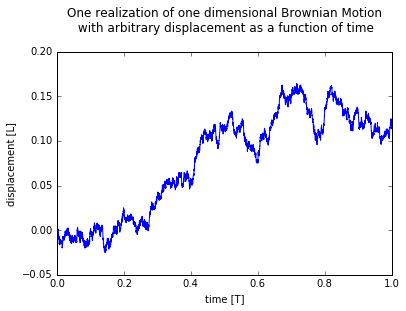

In [3]:
# 1D Brownian Motion
time = np.linspace(0, 1, 10000) #arbitrary time
x_dis = oneDBrownian(len(time))
#fig = plt.figure(figsize=(14, 8))
plt.plot(time, x_dis)
plt.title("One realization of one dimensional Brownian Motion\n with" 
          " arbitrary displacement as a function of time\n")
plt.xlabel("time [T]")
plt.ylabel("displacement [L]")
#plt.savefig('1D BM.png', bbox_inches='tight')

In [4]:
def twoDBrownian(size):
    """ Function produces values of Brownian motion displacement
    in 2 dimension
    Parameters:
    ----------
    size : int
           number of interations
    Returns:
    --------
    normDis : array
              displacement in x
    """
    normDisX = np.random.normal(0, 0.001, size)
    normDisY = np.random.normal(0, 0.001, size)
    normDisX = np.cumsum(normDisX)
    normDisY = np.cumsum(normDisY)
    return normDisX, normDisY

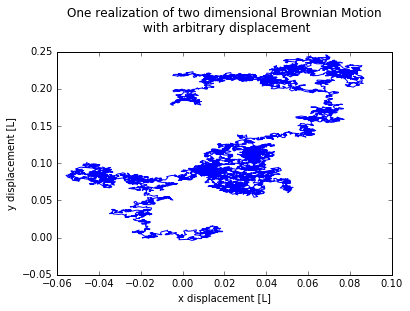

In [5]:
# 2d brownian
xDis, yDis = twoDBrownian(len(time))
#fig = plt.figure(figsize=(14, 8))
plt.plot(xDis, yDis)
plt.title("One realization of two dimensional Brownian Motion\n with" 
          " arbitrary displacement\n")
plt.xlabel("x displacement [L]")
plt.ylabel("y displacement [L]")
#plt.savefig('2D BM.png', bbox_inches='tight')

In [6]:
def LangevinDiffusion1D(xk, df, h=0.0001):
    """ Langevin Monte Carlo Iterative Method, to solve the
    Langevin Diffusion Stochastic Differential Equation
    Parameters in one dimension
    ----------
    xk : float
         previous position
    df : lamda function
         spatial derivative of 'drift function' of Brownian motion
    h  : float
         tuning parameter, default value set to 0.0001
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    drift = h*df(xk)
    noise = np.sqrt(2*h)*np.random.normal(0, 1)
    x_k1 = xk - drift + noise
    return x_k1  

In [7]:
def MarkovChain1D(xk, num, df):
    """ Function produces the Markov Chain displacement sequence of a particle
    ----------
    xk  : float
          initial position
    num : int
          number of iterations
    df  : lamda function
          spatial derivative of 'drift function' of Brownian motion
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    displacement = [xk]
    for i in range(num - 1):
        xk = LangevinDiffusion1D(xk, df)
        displacement.append(xk)
    return displacement

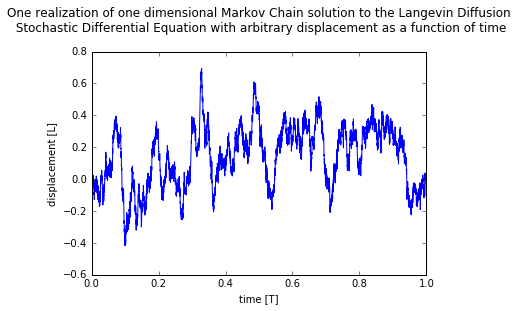

In [8]:
f = lambda xk: xk**2
df = lambda xk: 2.0*xk
displacement = MarkovChain1D(0, 10000, df)
#fig = plt.figure(figsize=(14, 8))
time = np.linspace(0, 1, 10000) #arbitrary time
plt.plot(time, displacement)
plt.title("One realization of one dimensional Markov Chain solution to the Langevin Diffusion\n" 
          " Stochastic Differential Equation with arbitrary displacement as a function of time\n")
plt.xlabel("time [T]")
plt.ylabel("displacement [L]")
#plt.savefig('Langevin 1D.png', bbox_inches='tight')

In [9]:
def LangevinDiffusion2D(xk, df, h=0.0001):
    """ Langevin Monte Carlo Iterative Method, to solve the
    Langevin Diffusion Stochastic Differential Equation
    Parameters in one dimension
    ----------
    xk : numpy array
         previous position
    df : lamda function
         spatial derivative of 'drift function' of Brownian motion
    h  : float
         tuning parameter, default value set to 0.0001
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    xk = xk.astype(float)
    drift = np.array([h*df[0](xk[0], xk[1]), h*df[1](xk[0], xk[1])])
    noise = np.array([np.sqrt(2*h)*np.random.normal(0, 1), np.sqrt(2*h)*np.random.normal(0, 1)])
    x_k1 = xk - drift + noise
    return x_k1  

In [13]:
def MarkovChain2D(xk, num, df, absorb=True):
    """ Function produces the Markov Chain displacement sequence of a particle
    ----------
    xk  : numpy array
          initial position
    num : int
          number of iterations
    df  : lambda function
          spatial derivative of 'drift function' of Brownian motion
    absorb : boolean
          If True, absorbing boundary condition 
          If False, reflecting boundary condition
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    disX = np.array([xk[0]])
    disY = np.array([xk[1]])
    # reflected points [x,y, x,y, x,y ...]
    reflected = np.array([], dtype=np.float)
    for i in range(0, num - 1, 1):
        previous_xk = xk
        xk = LangevinDiffusion2D(xk, df)
        if norm(xk) > 1.0 and absorb:                  ## absorbing boundary
            return disX, disY
        elif not absorb and norm(xk) > 1.0:            ## reflecting boundary
            reflected = np.append(reflected, previous_xk[0])
            reflected = np.append(reflected, previous_xk[1])
            xk = previous_xk
        disX = np.append(disX, xk[0])
        disY = np.append(disY, xk[1])
    return disX, disY, reflected

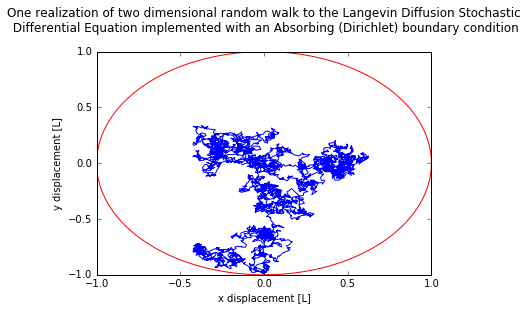

In [15]:
# Absorbing ball boundary and 2d langevin equation
f = lambda x1, x2: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2: 2.0*x1/(1 - x1**2 - x2**2)
df_x2 = lambda x1, x2: 2.0*x2/(1 - x1**2 - x2**2)
df = np.array([df_x1, df_x2])

#fig = plt.figure(figsize=(8, 8))
initPos = np.array([0,0])
disX, disY = MarkovChain2D(initPos, 10000, df)
plt.plot(disX, disY)

#draw circle
u = np.mgrid[0:2*np.pi:200j]
x=np.cos(u)
y=np.sin(u)
plt.plot(x, y, color="r")
plt.title("One realization of two dimensional random walk to the Langevin Diffusion Stochastic\n" 
          " Differential Equation implemented with an Absorbing (Dirichlet) boundary condition\n")
plt.xlabel("x displacement [L]")
plt.ylabel("y displacement [L]")
#plt.savefig('Langevin 2D Absorbing boundary.png', bbox_inches='tight')

In [169]:
# Solving Laplace's Equation using Brownian Motion
# Finding the expectation - the harmonic measure of a well behaved function

f = lambda x1, x2: -1.0*np.log(2 - x1**2 - x2**2)
df_x1 = lambda x1, x2: 2.0*x1/(2 - x1**2 - x2**2)
df_x2 = lambda x1, x2: 2.0*x2/(2 - x1**2 - x2**2)
df = np.array([df_x1, df_x2])

initPos = np.array([0,0])
xi = np.array([], dtype=np.double)

for i in range(0, 10, 1):
    disX, disY = MarkovChain2D(initPos, 10000, df)
    xi = np.append(xi, disX[-1])
    xi = np.append(xi, disY[-1])

function_sum = 0
for j in range(0, len(xi), 2):
    point = f(xi[j], xi[j+1])
    function_sum += point
expectation = (function_sum * 2) / len(xi)
print "Expectation - Harmonic measure of a well behaved function: ", expectation

Expectation - Harmonic measure of a well behaved function:  -0.0213076817316


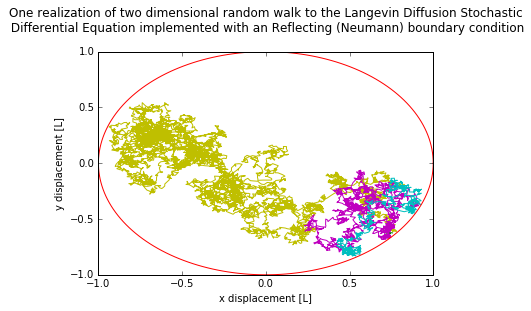

In [108]:
# Reflecting ball boundary and 2d langevin equation
f = lambda x1, x2: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2: 2.0*x1/(1 - x1**2 - x2**2)
df_x2 = lambda x1, x2: 2.0*x2/(1 - x1**2 - x2**2)
df = np.array([df_x1, df_x2])

#fig = plt.figure(figsize=(8, 8))
colour_list = ['y', 'g', 'm', 'c', 'k', 'y', 'g', 'c', 'm', 'k']
initPos = np.array([0,0])
disX, disY, reflected = MarkovChain2D(initPos, 10000, df, absorb=False)

if (len(reflected) > 0):
    j = 0
    previous = 0
    for i in range(0, len(reflected), 2):
        index_value = list(disX).index(reflected[i]) # get the index
        plt.plot(disX[previous:index_value], disY[previous:index_value], color=colour_list[j])
        j += 1
        previous = index_value
else:
    plt.plot(disX[0:len(disX)], disY[0:len(disY)], color='b')

#draw circle
u = np.mgrid[0:2*np.pi:200j]
x=np.cos(u)
y=np.sin(u)
plt.plot(x, y, color="r")
plt.title("One realization of two dimensional random walk to the Langevin Diffusion Stochastic\n" 
          " Differential Equation implemented with an Reflecting (Neumann) boundary condition\n")
plt.xlabel("x displacement [L]")
plt.ylabel("y displacement [L]")
#plt.savefig('Langevin 2D Reflecting boundary.png', bbox_inches='tight')

In [67]:
def LangevinDiffusion3D(xk, df, h=0.0001):
    """ Langevin Monte Carlo Iterative Method, to solve the
    Langevin Diffusion Stochastic Differential Equation
    Parameters in one dimension
    ----------
    xk : numpy array
         previous position
    df : lamda function
         spatial derivative of 'drift function' of Brownian motion
    h  : float
         tuning parameter, default value set to 0.0001
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    xk = xk.astype(float)
    x_drift = h*df[0](xk[0], xk[1], xk[2])
    y_drift = h*df[1](xk[0], xk[1], xk[2])
    z_drift = h*df[2](xk[0], xk[1], xk[2])
    drift = np.array([x_drift, y_drift, z_drift])
    x_noise = np.sqrt(2*h)*np.random.normal(0, 1)
    y_noise = np.sqrt(2*h)*np.random.normal(0, 1)
    z_noise = np.sqrt(2*h)*np.random.normal(0, 1)
    noise = np.array([x_noise, y_noise, z_noise])
    x_k1 = xk - drift + noise
    return x_k1  

In [68]:
def MarkovChain3D(xk, num, df, absorb=True):
    """ Function produces the Markov Chain displacement sequence of a particle
    ----------
    xk  : numpy array
          initial position
    num : int
          number of iterations
    df  : lamda function
          spatial derivative of 'drift function' of Brownian motion
    absorb : boolean
          If True, absorbing boundary condition 
          If False, reflecting boundary condition
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    disX = np.array([xk[0]])
    disY = np.array([xk[1]])
    disZ = np.array([xk[2]])
    # reflected points [x,y,z, x,y,z, x,y,z ...]
    reflected = np.array([], dtype=np.float)
    for i in range(0, num - 1, 1):
        previous_xk = xk
        xk = LangevinDiffusion3D(xk, df)
        if norm(xk) > 1.0 and absorb:                          ## absorbing boundary
            return disX, disY, disZ
        elif not absorb and norm(xk) > 1.0:                    ## reflecting boundary
            reflected = np.append(reflected, previous_xk[0])
            reflected = np.append(reflected, previous_xk[1])
            reflected = np.append(reflected, previous_xk[2])
            xk = previous_xk
        disX = np.append(disX, xk[0])
        disY = np.append(disY, xk[1])
        disZ = np.append(disZ, xk[2])
    return disX, disY, disZ, reflected

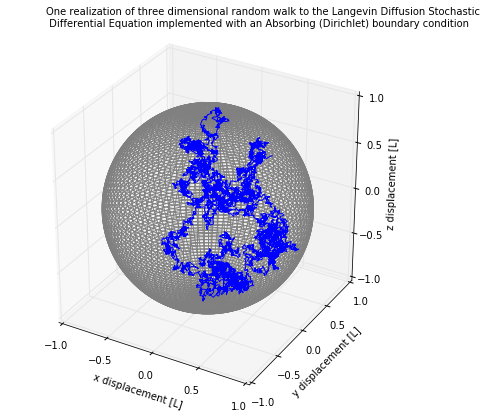

In [112]:
# absorbing ball boundary and 3d langevin equation
f = lambda x1, x2, x3: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2, x3: 2.0*x1/(1 - x1**2 - x2**2 - x3**2)
df_x2 = lambda x1, x2, x3: 2.0*x2/(1 - x1**2 - x2**2 - x3**2)
df_x3 = lambda x1, x2, x3: 2.0*x3/(1 - x1**2 - x2**2 - x3**2)
df = np.array([df_x1, df_x2, df_x3])

initPos = np.array([0,0,0])
disX, disY, disZ = MarkovChain3D(initPos, 10000, df)
fig = plt.figure()
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')
ax.plot(disX, disY, disZ)

#draw sphere
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="grey")
ax.text2D(0.1, 0.95, "One realization of three dimensional random walk to the Langevin Diffusion Stochastic\n" 
          " Differential Equation implemented with an Absorbing (Dirichlet) boundary condition\n", transform=ax.transAxes)
ax.set_xlabel('x displacement [L]')
ax.set_ylabel('y displacement [L]')
ax.set_zlabel('z displacement [L]')
#plt.savefig('Langevin 3D Absorbing boundary.png', bbox_inches='tight')

[ 0.06790674 -0.70155432  0.67793786  0.15868579 -0.72111912  0.66006168
  0.15868579 -0.72111912  0.66006168  0.25933691 -0.42846221  0.85539545
 -0.80538233 -0.212277   -0.52819154 -0.6993869  -0.21660811 -0.67192921
 -0.62387624 -0.12884818 -0.75556796]


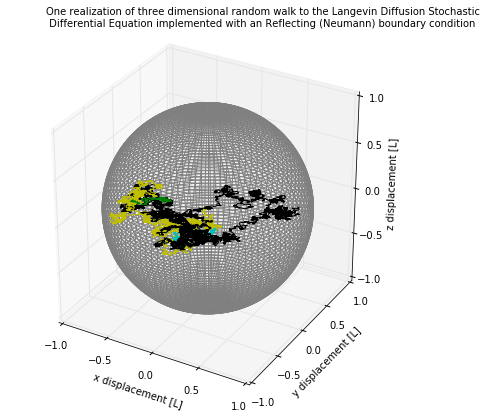

In [115]:
# reflecting ball boundary and 3d langevin equation
f = lambda x1, x2, x3: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2, x3: 2.0*x1/(1 - x1**2 - x2**2 - x3**2)
df_x2 = lambda x1, x2, x3: 2.0*x2/(1 - x1**2 - x2**2 - x3**2)
df_x3 = lambda x1, x2, x3: 2.0*x3/(1 - x1**2 - x2**2 - x3**2)
df = np.array([df_x1, df_x2, df_x3])

colour_list = ['y', 'g', 'm', 'c', 'k', 'y', 'g', 'c', 'm', 'k']
initPos = np.array([0,0,0])
disX, disY, disZ, reflected = MarkovChain3D(initPos, 10000, df, absorb=False)

# find the reflected point and make it a different colour
# There is a fault in this code - Only takes into account the first reflection being a different color
fig = plt.figure()
fig = plt.figure(figsize=(7, 7))
ax = fig.gca(projection='3d')

print reflected
if (len(reflected) > 0):
    j = 0
    previous = 0
    for i in range(0, len(reflected), 3):
        index_value = list(disX).index(reflected[i]) # get the index
        plt.plot(disX[previous:index_value], disY[previous:index_value], color=colour_list[j])
        j += 1
        previous = index_value
else:
    ax.plot(disX[0:len(disX)], disY[0:len(disY)], disZ[0:len(disZ)])

#draw sphere
u, v = np.mgrid[0:2*np.pi:100j, 0:np.pi:100j]
x=np.cos(u)*np.sin(v)
y=np.sin(u)*np.sin(v)
z=np.cos(v)
ax.plot_wireframe(x, y, z, color="grey")

ax.text2D(0.1, 0.95, "One realization of three dimensional random walk to the Langevin Diffusion Stochastic\n" 
          " Differential Equation implemented with an Reflecting (Neumann) boundary condition\n", transform=ax.transAxes)
ax.set_xlabel('x displacement [L]')
ax.set_ylabel('y displacement [L]')
ax.set_zlabel('z displacement [L]')
#plt.savefig('Langevin 3D Reflecting boundary.png', bbox_inches='tight')

In [153]:
# Extending to other polygons - harmonic measure

def ReflectingSquare2D(xk, num, df):
    """ Function produces the Markov Chain displacement sequence of a particle
    ----------
    xk  : numpy array
          initial position
    num : int
          number of iterations
    df  : lambda function
          spatial derivative of 'drift function' of Brownian motion
    absorb : boolean
          If True, absorbing boundary condition 
          If False, reflecting boundary condition
    Returns:
    ----------
    x_k1 : float
           next iteration
    """
    disX = np.array([xk[0]])
    disY = np.array([xk[1]])
    # reflected points [x,y, x,y, x,y ...]
    reflected = np.array([], dtype=np.float)
    for i in range(0, num - 1, 1):
        previous_xk = xk
        xk = LangevinDiffusion2D(xk, df)
        #reflecting square boundary
        if xk[0] > 0.25 or xk[0] < -0.25 or xk[1] > 0.5 or xk[1] < -0.5:
            reflected = np.append(reflected, previous_xk[0])
            reflected = np.append(reflected, previous_xk[1])
            xk = previous_xk
        disX = np.append(disX, xk[0])
        disY = np.append(disY, xk[1])
    return disX, disY, reflected

IndexError: list index out of range

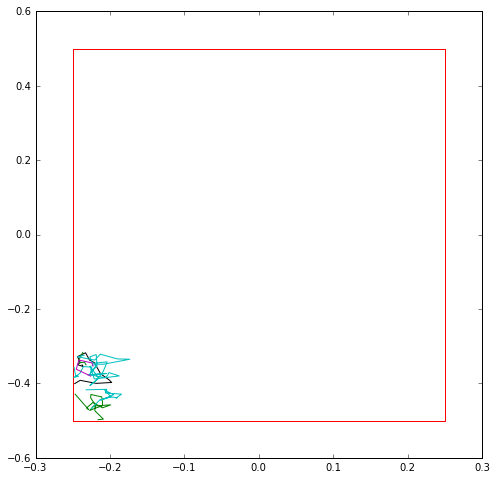

In [175]:
# Reflecting rectangle boundary and 2d langevin equation
f = lambda x1, x2: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2: 2.0*x1/(1 - x1**2 - x2**2)
df_x2 = lambda x1, x2: 2.0*x2/(1 - x1**2 - x2**2)
df = np.array([df_x1, df_x2])

fig = plt.figure(figsize=(8, 8))
colour_list = ['y', 'g', 'm', 'c', 'k', 'y', 'g', 'c', 'm', 'k', 'y', 'g', 'c', 'm', 'k']
initPos = np.array([-0.24, -0.4])
disX, disY, reflected = ReflectingSquare2D(initPos, 10000, df)

#draw rectangle
xline = [-0.25, 0.25]
yline = [-0.5, -0.5]
xline2 = [-0.25, 0.25]
yline2 = [0.5, 0.5]
xline3 = [-0.25, -0.25]
yline3 = [-0.5, 0.5]
xline4 = [0.25, 0.25]
yline4 = [0.5, -0.5]
plt.xlim(-0.3, 0.3)
plt.ylim(-0.6, 0.6)
plt.plot(xline, yline, color="r")
plt.plot(xline2, yline2, color="r")
plt.plot(xline3, yline3, color="r")
plt.plot(xline4, yline4, color="r")

# plot reflecting colour
if (len(reflected) > 0):
    j = 0
    previous = 0
    for i in range(0, len(reflected), 2):
        index_value = list(disX).index(reflected[i]) # get the index
        plt.plot(disX[previous:index_value], disY[previous:index_value], color=colour_list[j])
        j += 1
        previous = index_value
else:
    plt.plot(disX[0:len(disX)], disY[0:len(disY)], color='b')

plt.title("One realization of two dimensional random walk to the Langevin Diffusion Stochastic\n" 
          " Differential Equation implemented with an Reflecting (Neumann) boundary condition\n")
plt.xlabel("x displacement [L]")
plt.ylabel("y displacement [L]")
#plt.savefig('Langevin 2D Reflecting boundary.png', bbox_inches='tight')

In [170]:
# Running many simulations of Absorbing Brownian Motion, and finding the average value of position
# currently only applicable in the positive quadrant of the sphere centered at the origin

# temporary problem

def AveragePosition(initPos, num_iterPos, df, num_iterPath):
    """ Function finds an average position of the Brownian Motion
        particle on the boundary of the sphere
    ----------
    initPos  : float
               initial position
    num_iterPos : int
                  number of iterations of Monte Carlo Algorithm
    df  : lamda function
          spatial derivative of 'drift function' of Brownian motion
    num_iterPath : int
                   number of paths to travel by the particle
    Returns:
    ----------
    avgPos : numpy array
             average position vector of particle on the boundary
             after simulating num_iterPath paths
    """
    i = 0;
    accumulatePos = np.array([0.0, 0.0, 0.0], dtype=np.float)
    while (i != num_iterPath):
        # absorb=True - absorbing boundary
        disX, disY, disZ = MarkovChain3D(initPos, num_iterPos, df)
        accumulatePos[0] += abs(disX[len(disX) -1])
        accumulatePos[1] += abs(disY[len(disY) - 1])
        accumulatePos[2] += abs(disZ[len(disZ) - 1])
        i += 1
    return accumulatePos / num_iterPath

In [171]:
f = lambda x1, x2, x3: -1.0*np.log(1 - x1**2 - x2**2)
df_x1 = lambda x1, x2, x3: 2.0*x1/(1 - x1**2 - x2**2 - x3**2)
df_x2 = lambda x1, x2, x3: 2.0*x2/(1 - x1**2 - x2**2 - x3**2)
df_x3 = lambda x1, x2, x3: 2.0*x3/(1 - x1**2 - x2**2 - x3**2)
df = np.array([df_x1, df_x2, df_x3])
initPos = np.array([0,0,0], dtype=np.float)

avgPosVec = AveragePosition(initPos, 10000, df, 1000)
print avgPosVec
print norm(avgPosVec)

ValueError: too many values to unpack